### Construct the model with sci-ki learn

In [1]:
## Load all the 1000*2 training dataset scraped
from sklearn.datasets import load_files

PATH = 'training dataset'
DESCR = 'positive negative dataset'
categories = ['positive', 'negative']
train_data = load_files(container_path=PATH, description=DESCR, shuffle=True, random_state = 20)
for i in range(len(train_data.data)):
    train_data.data[i] = str(train_data.data[i])
    train_data.data[i] = train_data.data[i].replace(train_data.data[i][0:2], "")
    train_data.data[i] = train_data.data[i].replace(train_data.data[i][-1], "")

In [2]:
## Construct the popeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])
text_clf.fit(train_data.data, train_data.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [3]:
from datasets import load_dataset
raw_datasets = load_dataset("json", data_files={"test": ["mesh_train.json","mesh_val.json","mesh_test.json"]})

Using custom data configuration default-b13d81032a6e02d1


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset json downloaded and prepared to C:\Users\13056\.cache\huggingface\datasets\json\default-b13d81032a6e02d1\0.0.0\ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

### Change the threshold to see the difference

In [4]:
## Load all the 1000*2 training dataset scraped
import numpy as np
categories = ['negative','positive']
test_data = raw_datasets["test"]["text"]
test_target = raw_datasets["test"]["label"]
threshold = 0.5 # change the threshold

pred_prob = text_clf.predict_proba(test_data)  
predicted = np.where(pred_prob[:,1] > threshold, 1, 0)
score = np.mean(predicted == test_target)
print("Accuracy: ",score)

Accuracy:  0.7178080575709314


In [5]:
## Evaluate the model
from sklearn import metrics
f1 = metrics.f1_score(test_target, predicted, average='macro')
print(metrics.classification_report(test_target, predicted, target_names=categories))
print("Macro-F1 score: {0}".format(f1))

              precision    recall  f1-score   support

    negative       0.99      0.69      0.82     15207
    positive       0.26      0.92      0.40      1746

    accuracy                           0.72     16953
   macro avg       0.62      0.81      0.61     16953
weighted avg       0.91      0.72      0.77     16953

Macro-F1 score: 0.6086661777194472


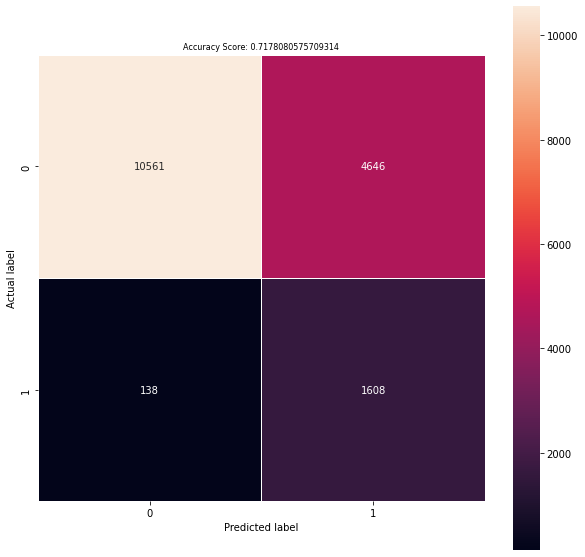

In [6]:
## Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(test_target, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 8);

### Summary

In [7]:
sz_whole = len(test_target)
sz_p = sum(test_target)
sz_n = sz_whole - sz_p

In [8]:
print("The size of the whole dataset (articles with MeSH term: Heart Transplantation): ", sz_whole)
print("The size of the positive dataset (articles with MeSH term: Heart Transplantation and with Qualifier: Mortality): ", sz_p)
print("The size of the negative dataset (articles with MeSH term: Heart Transplantation and without Qualifier: Mortality): ", sz_n)
print("%d positive articles (around %.2f%% of the positive dataset) are classified as negative" % (cm[1][0],100*cm[1][0]/sz_p))
print()
print("%d negative articles (around %.2f%% of the negative dataset) are classified as positive," % (cm[0][1],100*cm[0][1]/sz_n),"which implies some negative articles may be wrongly classified by the PubMed")


The size of the whole dataset (articles with MeSH term: Heart Transplantation):  16953
The size of the positive dataset (articles with MeSH term: Heart Transplantation and with Qualifier: Mortality):  1746
The size of the negative dataset (articles with MeSH term: Heart Transplantation and without Qualifier: Mortality):  15207
138 positive articles (around 7.90% of the positive dataset) are classified as negative

4646 negative articles (around 30.55% of the negative dataset) are classified as positive, which implies some negative articles may be wrongly classified by the PubMed
